#### Corner Detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1: Read the grayscale image
image = cv2.imread('../img/sample.jpeg', cv2.IMREAD_GRAYSCALE)  # Replace with your image path

In [3]:
# Step 2: Harris Corner Detection
harris_image = np.float32(image)
harris_corners = cv2.cornerHarris(harris_image, blockSize=2, ksize=3, k=0.04)

In [4]:
# Dilate corner image to enhance corner points
harris_corners = cv2.dilate(harris_corners, None)

In [5]:
# Highlight corners on original image
harris_image_display = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
harris_image_display[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]  # Red corners

In [6]:
# Step 3: Shi-Tomasi Corner Detection
shi_tomasi_corners = cv2.goodFeaturesToTrack(image, maxCorners=100, qualityLevel=0.01, minDistance=10)
shi_tomasi_corners = np.int32(shi_tomasi_corners)  # Updated conversion method

In [7]:
# Display corners on original image
shi_tomasi_image_display = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for corner in shi_tomasi_corners:
    x, y = corner.ravel()
    cv2.circle(shi_tomasi_image_display, (x, y), 5, (0, 255, 0), -1)  # Green circles

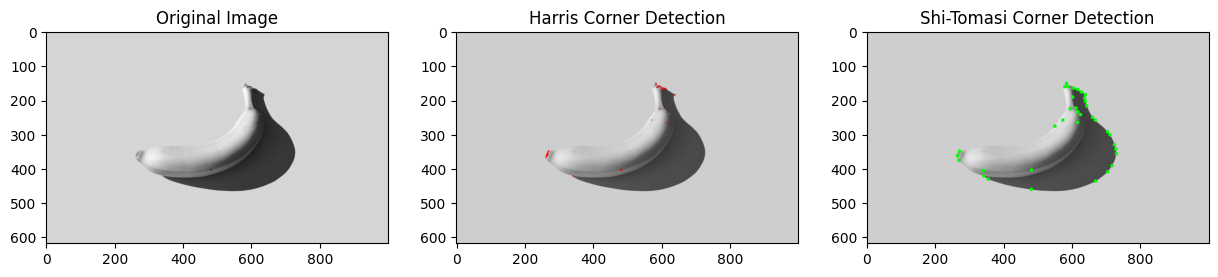

In [8]:
# Step 4: Display the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")

axes[1].imshow(cv2.cvtColor(harris_image_display, cv2.COLOR_BGR2RGB))
axes[1].set_title("Harris Corner Detection")

axes[2].imshow(cv2.cvtColor(shi_tomasi_image_display, cv2.COLOR_BGR2RGB))
axes[2].set_title("Shi-Tomasi Corner Detection")

plt.show()